### 목표 설정
- 특성 변수를 활용해서 회귀예측을 진행해보자
- 특성곱이라는 특성 공학을 진행해보자

In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 데이터 로딩 
data = pd.read_csv('data/boston_housing.csv')
data

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
# 필요없는 컬럼 제거하기
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
# 데이터프레임 간략한 정보 확인하기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
# 데이터의 컬럼을 살펴봅시다
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

**설명변수(특성변수, 문제데이터, 특성값)**
- 원인 : 예측을 설명할 수 있는 변수 / 종속변수에 영향을 미치는 변수
    - 'CRIM'(criminal) : 범죄율
    - 'ZN' : 25,000평방 피트를 초과한 거주지역의 비율
    - 'INDUS'(industry) : 비소매상업지역의 비율
    - 'CHAS' : 찰스강의 경계선에 위치하는가? 경계에 위치한 경우 1 / 아니면 0
    - 'NOX' : 대기 중 일산화질소의 농도
    - 'RM' : 방의 개수
    - 'AGE' : 1940년 이전에 지어진 주택의 비율 
    - 'DIS'(distance) : 직업센터와의 거리 (보스턴은 중공업으로 먹고 살아서)
    - 'RAD' : 방사형 도로(회전교차로)와의 접근성
    - 'TAX' : 재산세의 비율 
    - 'PTRATIO' : 학생/교사의 비율 (우리나라의 학군)
    - 'B' : 인구 중 흑인의 비율 (빈민가에 사는 인식)
    - 'LSTAT' : 인구 중 하위 계층의 비율 (소득분위별)
    
**반응변수(예측값, 정답 데이터)**
- 결과 : 우리가 예측하고자 하는 값 / 독립변수의 영향을 받아 변화하는 값
    - 'MEDV' : 주택 가격

In [6]:
# 데이터 분할
# X = data.drop('MEDV', axis = 1)
# X = data.iloc[:, :13]
X = data.loc[:, :'LSTAT']

y = data['MEDV'] # 행 슬라이싱, 열 인덱싱

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
# train / test 셋으로 분리
# 비율은 7 : 3 / 랜덤 시드 = 0
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.3, # train_size=0.7
                                                random_state=0)
print("훈련 문제", X_train.shape)
print("훈련 답", y_train.shape)
print("테스트 문제", X_test.shape)
print("테스트 답", y_test.shape)

훈련 문제 (354, 13)
훈련 답 (354,)
테스트 문제 (152, 13)
테스트 답 (152,)


### 선형 회귀 모델 사용해보기

In [9]:
# 모델 불러오기
from sklearn.linear_model import LinearRegression

In [10]:
linear_model = LinearRegression()

In [11]:
# 모델 학습
linear_model.fit(X_train, y_train)

LinearRegression()

In [12]:
# 실제 가격 예측해보기
pre = linear_model.predict(X_test)
pre  # 만 단위 -> 24.9357079 -> 24만 달러

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [13]:
# 회귀 평가 지표 확인해보기
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

In [14]:
# 평균제곱오차
mean_squared_error(pre, y_test)
# 27만 달러 정도의 오차가 나온다 -> 현재 오차는 제곱이 되어 있는 상태이다

27.195965766883273

In [15]:
# 평균 제곱근 오차
# 제곱된 오차를 원래 사이즈로 바꿔주자
np.sqrt(mean_squared_error(pre, y_test))
# 5만 2천 달러 정도의 오차 -> 한화 7천만원 정도

5.214975145375409

In [16]:
r2_score(y_test, pre)
# 67% 정도

0.6733825506400188

- 결정계수
    - 추정한 선형 모델이 주어진 자료에 적합한지를 판단하는 척도
    - 독립변수(특성값)가 종속변수(예측값)의 분산을 판단하는 척도
    - R2의 범위 : 0 ~ 1 (값이 심하게 틀어지면 -값이 나오기도 한다)
    - R2스코어가 1이 나온 경우 독립변수를 이용해서 종속변수를 100% 완벽하게 예측했다.
    - R2스코어가 0이 나온 경우 독립변수가 종속변수를 예측하는데 도움이 되지 않았다.

In [17]:
# 평균 절대 오차 
mean_absolute_error(y_test, pre)
# 3만 6천 달러 정도의 오차 

3.609904060381817

In [18]:
# 모델 자체 스코어 점수
linear_model.score(X_train, y_train)

0.7645451026942549

In [19]:
linear_model.score(X_test, y_test)
# R2스코어 값과 동일

0.6733825506400188

- 현재 선형모델은 성능이 좋지 않다. 모델의 성능을 향상시키는 방법을 찾아보자.
- 선형모델의 성능은 데이터가 많을수록 좋아진다. 
- 성능이 좋다라는 개념은 훈련 데이터의 성능이 조금 떨어지더라도 새로운 데이터 반응을 잘 하는 것을 이야기한다.

### 특성 확장
- 모델의 성능을 올려보기 위해 새로운 특성을 추가시켜보자!

In [20]:
# 특성 확장을 위해 데이터를 가지고 오자
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [21]:
# 원본 데이터는 잘못 건드릴 시 데이터 오염으로 인해 사용하기 어려울 수 있다.
# 원본 데이터와 똑같은 형태로 새로운 객체를 만들어주자 (복사)
data_copy = data.copy()

In [22]:
data_copy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [23]:
# 집 값과 연관관계가 높은 특성을 찾아봅시다! 
# 상관관계(상관계수) : 산점도에서 대략적으로 파악할 수 있는 두 변수의 관계를 하나의 수치로 나타내는 방법 
# 1 or -1 : 절대적인 상관관계가 있음(한 값이 커지면 똑같은 비율로 커지거나 작아지는 경우)
# 0.7이상 or -0.7이하 : 강한 상관관계가 있음
# 0.3이하 or -0.3이상 : 약한 상관관계가 있음
# 0 : 전혀 상관 없음

data_copy.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [24]:
# abs() : 절대값을 구하는 함수
data_copy.corr().abs()
# 우리가 확인해야하는 MEDV라는 컬럼의 상관계수를 내림차순 정렬
data_copy.corr().abs().sort_values(by='MEDV', ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,0.388305,0.360445,0.483725,0.175260,0.427321,0.695360,0.376955,0.249929,0.381626,0.468536,0.507787,0.333461,0.737663,1.000000
LSTAT,0.455621,0.412995,0.603800,0.053929,0.590879,0.613808,0.602339,0.496996,0.488676,0.543993,0.374044,0.366087,1.000000,0.737663
RM,0.219247,0.311991,0.391676,0.091251,0.302188,1.000000,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.695360
PTRATIO,0.289946,0.391679,0.383248,0.121515,0.188933,0.355501,0.261515,0.232471,0.464741,0.460853,1.000000,0.177383,0.374044,0.507787
INDUS,0.406583,0.533828,1.000000,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725
TAX,0.582764,0.314563,0.720760,0.035587,0.668023,0.292048,0.506456,0.534432,0.910228,1.000000,0.460853,0.441808,0.543993,0.468536
NOX,0.420972,0.516604,0.763651,0.091203,1.000000,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
CRIM,1.000000,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
RAD,0.625505,0.311948,0.595129,0.007368,0.611441,0.209847,0.456022,0.494588,1.000000,0.910228,0.464741,0.444413,0.488676,0.381626
AGE,0.352734,0.569537,0.644779,0.086518,0.731470,0.240265,1.000000,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955


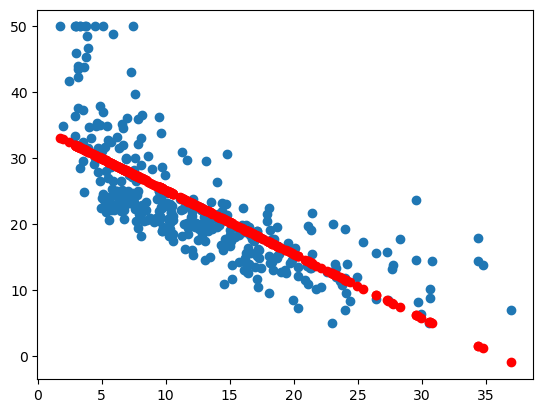

In [25]:
# 상관관계가 높은 특성에 대해 특성 확장을 진행해보자
# LSTAT 확인 
# Before) 일반 LSTAT만 가지고 학습시킨 후 예측을 확인해보자
model = LinearRegression()
model.fit(X_train[['LSTAT']], y_train)
pre = model.predict(X_train[['LSTAT']])

plt.scatter(X_train['LSTAT'], y_train)  # 산점도 
plt.scatter(X_train['LSTAT'], pre, color='red')
plt.show()

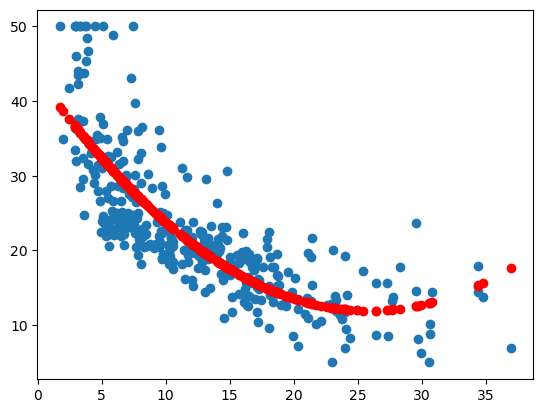

In [26]:
# 특성 확장 진행 
X_train['LSTAT x LSTAT'] = X_train['LSTAT'] * X_train['LSTAT']

model = LinearRegression()
model.fit(X_train[['LSTAT', 'LSTAT x LSTAT']], y_train)
pre = model.predict(X_train[['LSTAT', 'LSTAT x LSTAT']])

plt.scatter(X_train['LSTAT'], y_train)  # 산점도 
plt.scatter(X_train['LSTAT'], pre, color='red')
plt.show()

In [27]:
# 선형 회귀 모델은 직선형태인데 곡선으로 나왔다. 선형 회귀로 봐야할까?
# -> 선형성이 유지된 선형 회귀 모델로 볼 수 있다!
# -> 하나의 차원을 추가한 것

In [28]:
X_test['LSTAT x LSTAT'] = X_test['LSTAT'] * X_test['LSTAT']

# 특성 확장한 데이터를 추가해서 성능을 체크해보자
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)
# 약 2% 성능 상승

0.6978697736472472

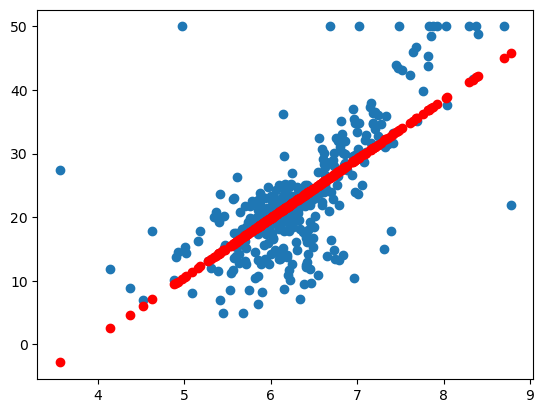

In [29]:
# 상관관계가 높은 특성에 대해 특성 확장을 진행해보자
# RM 확인 
# Before) 일반 RM만 가지고 학습시킨 후 예측을 확인해보자
model = LinearRegression()
model.fit(X_train[['RM']], y_train)
pre = model.predict(X_train[['RM']])

plt.scatter(X_train['RM'], y_train)  # 산점도 
plt.scatter(X_train['RM'], pre, color='red')
plt.show()

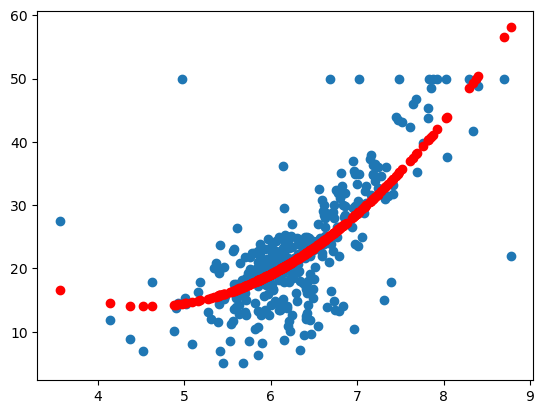

In [30]:
# 특성 확장 진행 
X_train['RM x RM'] = X_train['RM'] * X_train['RM']

model = LinearRegression()
model.fit(X_train[['RM', 'RM x RM']], y_train)
pre = model.predict(X_train[['RM', 'RM x RM']])

plt.scatter(X_train['RM'], y_train)  # 산점도 
plt.scatter(X_train['RM'], pre, color='red')
plt.show()

In [31]:
X_test['RM x RM'] = X_test['RM'] * X_test['RM']

# 특성 확장한 데이터를 추가해서 성능을 체크해보자
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)
# 약 5% 성능 상승 

0.7460776611187953

In [32]:
# 전체 특성 확장을 진행하면 성능이 높아지지 않을까? (가설)
X_train.drop(['LSTAT x LSTAT', 'RM x RM'], axis=1, inplace=True)
X_test.drop(['LSTAT x LSTAT', 'RM x RM'], axis=1, inplace=True)

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 141 to 172
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    float64
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    float64
 9   TAX      354 non-null    float64
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    354 non-null    float64
dtypes: float64(13)
memory usage: 38.7 KB


In [34]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 329 to 5
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     152 non-null    float64
 1   ZN       152 non-null    float64
 2   INDUS    152 non-null    float64
 3   CHAS     152 non-null    float64
 4   NOX      152 non-null    float64
 5   RM       152 non-null    float64
 6   AGE      152 non-null    float64
 7   DIS      152 non-null    float64
 8   RAD      152 non-null    float64
 9   TAX      152 non-null    float64
 10  PTRATIO  152 non-null    float64
 11  B        152 non-null    float64
 12  LSTAT    152 non-null    float64
dtypes: float64(13)
memory usage: 16.6 KB


In [35]:
# 경고창 지우기
import warnings
warnings.filterwarnings('ignore')

In [36]:
# 기존 확장 특성을 지우고 반복문을 이용해서 전체 컬럼 특성 확장 진행
extend_X_train = X_train.copy()

for col1 in X_train.columns : # 13번 반복
    for col2 in X_train.columns : # 13번 반복
        extend_X_train[col1 + 'x' + col2] = X_train[col1] * X_train[col2]

In [37]:
# 기존 확장 특성을 지우고 반복문을 이용해서 전체 컬럼 특성 확장 진행
extend_X_test = X_test.copy()

for col1 in X_test.columns : # 13번 반복
    for col2 in X_test.columns : # 13번 반복
        extend_X_test[col1 + 'x' + col2] = X_test[col1] * X_test[col2]

In [38]:
extend_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 141 to 172
Columns: 182 entries, CRIM to LSTATxLSTAT
dtypes: float64(182)
memory usage: 506.1 KB


In [39]:
extend_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 329 to 5
Columns: 182 entries, CRIM to LSTATxLSTAT
dtypes: float64(182)
memory usage: 217.3 KB


In [40]:
# 학습
linear_model.fit(extend_X_train, y_train)

LinearRegression()

In [41]:
linear_model.score(extend_X_test, y_test)
# 74% > 64% 

0.6486839499829934

In [42]:
linear_model.score(extend_X_train, y_train)
# 95% : 과대적합 의심

0.9517246762476054

- 특성이 너무 많아져서 과대적합에 걸렸다
- 테스트 데이터에 제대로 반응하지 못하는 모습을 보이고 있다.
- 선형 회귀 모델은 과대적합을 제어할 수 있는 하이퍼 파라미터가 없다.
- 하이퍼 파라미터 튜닝 역할을 대신해주는 규제 기능이 달린 모델을 사용해보자. 

### L2 - Ridge

In [43]:
# 모델 import 
from sklearn.linear_model import Ridge

In [44]:
# alpha 기본값 1.0
ridge_model = Ridge(alpha = 100)

In [46]:
ridge_model.fit(extend_X_train, y_train)

Ridge(alpha=100)

In [47]:
ridge_model.score(extend_X_test,y_test)

0.7767755128062308

In [48]:
ridge_model.score(extend_X_train, y_train)

0.9329467445816502

- test 성능은 좋아졌는데 과대적합은 완전하게 해소하지 못했다. 

### L1 - Lasso

In [49]:
from sklearn.linear_model import Lasso

In [50]:
# alpha 기본값 1.0
lasso_model = Lasso(alpha = 100)

In [51]:
lasso_model.fit(extend_X_train, y_train)

Lasso(alpha=100)

In [52]:
lasso_model.score(extend_X_test, y_test)

0.6958191262408874

In [53]:
lasso_model.score(extend_X_train, y_train)

0.8104918403690791

- 과대적합이 조금 해결되었다
- 현재 데이터는 라쏘가 조금 더 유리한 것 같다
- 특성 확장으로 인해 무의미한 특성들이 많이 늘어있는 상태
- 조건이 복잡해서 과대적합 발생!
- 무의미한 특성을 제외(가중치가 0이 되는)하는 Lasso모델이 조금 더 유리해 보인다

In [55]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


### 규제별 규제강도에 따른 가중치의 변화값 확인해보기

In [56]:
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000]  # 규제강도 모음집 / 기본값(1) 제외

ridge_coef_list = []  # 릿지모델 가중치 리스트
lasso_coef_list = []  # 랏쏘모델 가중치 리스트

# 릿지모델과 라쏘모델 가중치 변경하면서 학습 시켜보기 (반복문 사용)
for alpha in alpha_list :
    # 모델 설정부
    r_model = Ridge(alpha=alpha)
    l_model = Lasso(alpha=alpha)
    # 모델 학습부
    r_model.fit(X_train, y_train)
    l_model.fit(X_train, y_train)
    # 빈 리스트에 가중치 넣어주기
    ridge_coef_list.append(r_model.coef_)
    lasso_coef_list.append(l_model.coef_)

In [58]:
# 라쏘 정규화 규제강도별 가중치 확인해보기
lasso_df = pd.DataFrame(np.array(lasso_coef_list).T,
                       columns = alpha_list,
                       index = X_train.columns)
lasso_df

,0.001,0.010,0.100,10.000,100.000,1000.000
CRIM,-0.121161,-0.119781,-0.113118,-0.000000,-0.000000,-0.0
ZN,0.044526,0.045093,0.047251,0.031050,0.000000,0.0
INDUS,0.009928,-0.001208,-0.039925,-0.000000,-0.000000,-0.0
CHAS,2.497490,2.371394,0.964789,0.000000,0.000000,0.0
NOX,-15.884229,-12.789549,-0.000000,0.000000,-0.000000,-0.0
RM,3.859429,3.863614,3.722896,0.000000,0.000000,0.0
AGE,-0.010292,-0.013035,-0.021431,0.000000,-0.000000,-0.0
DIS,-1.495377,-1.450155,-1.233704,-0.000000,0.000000,0.0
RAD,0.241125,0.232505,0.204690,0.000000,-0.000000,-0.0
TAX,-0.011097,-0.011366,-0.012944,-0.010997,-0.021888,-0.0


In [59]:
# 릿지 정규화 규제강도별 가중치 확인해보기
ridge_df = pd.DataFrame(np.array(ridge_coef_list).T,
                       columns = alpha_list,
                       index = X_train.columns)
ridge_df
# 0.0000 (특성 제외된 값) 없다! ∵비율로 조정

,0.001,0.010,0.100,10.000,100.000,1000.000
CRIM,-0.121304,-0.121251,-0.120763,-0.116008,-0.109848,-0.089402
ZN,0.044470,0.044497,0.044753,0.048609,0.053624,0.054174
INDUS,0.011278,0.010711,0.005540,-0.047175,-0.052950,-0.035259
CHAS,2.511254,2.511310,2.510884,1.785961,0.483850,0.071015
NOX,-16.215572,-16.075800,-14.800321,-1.540350,-0.163749,-0.006989
RM,3.859184,3.860214,3.869280,3.620640,1.972206,0.431777
AGE,-0.010001,-0.010144,-0.011441,-0.021636,-0.005280,0.028926
DIS,-1.500067,-1.498261,-1.481782,-1.309680,-1.183078,-0.538181
RAD,0.242095,0.241661,0.237723,0.211507,0.253968,0.239244
TAX,-0.011073,-0.011082,-0.011165,-0.012664,-0.014718,-0.015490
